In [1]:
from keras.datasets import cifar10
import numpy as np
np.random.seed(10)

Using TensorFlow backend.


In [2]:
#取得Keras Dataset
(x_img_train,y_label_train),(x_img_test,y_label_test)=cifar10.load_data()

170500096/170498071 [==============================] - 6s 0us/step


In [3]:
#確認 CIFAR10 Dataset 資料維度
print("train data:",'images:',x_img_train.shape,
      " labels:",y_label_train.shape) 
print("test  data:",'images:',x_img_test.shape ,
      " labels:",y_label_test.shape) 

train data: images: (50000, 32, 32, 3)  labels: (50000, 1)
test  data: images: (10000, 32, 32, 3)  labels: (10000, 1)


In [0]:
#資料正規化
x_img_train_normalize = x_img_train.astype('float32') / 255.0
x_img_test_normalize = x_img_test.astype('float32') / 255.0

In [5]:
#針對Label 做 ONE HOT ENCODE
from keras.utils import np_utils
y_label_train_OneHot = np_utils.to_categorical(y_label_train)
y_label_test_OneHot = np_utils.to_categorical(y_label_test)
y_label_test_OneHot.shape

(10000, 10)

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D

In [0]:
model = Sequential()

In [0]:
model.add(Conv2D(filters=32,kernel_size=(3,3),
                 input_shape=(32, 32,3), 
                 activation='relu', 
                 padding='same'))

model.add(Dropout(rate=0.25))

model.add(MaxPooling2D(pool_size=(2, 2)))

In [0]:
model.add(Conv2D(filters=64, kernel_size=(3, 3), 
                 activation='relu', padding='same'))

model.add(Dropout(0.25))

model.add(MaxPooling2D(pool_size=(2, 2)))

#建立神經網路(平坦層、隱藏層、輸出層)

model.add(Flatten())
model.add(Dropout(rate=0.25))

model.add(Dense(1024, activation='relu'))
model.add(Dropout(rate=0.25))

model.add(Dense(10, activation='softmax'))

In [10]:
#檢查model 的STACK
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
dropout_2 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4096)             

In [11]:
try:
    model.load_weights("SaveModel/cifarCnnModel.h5")
    print("載入模型成功!繼續訓練模型")
except :    
    print("載入模型失敗!開始訓練一個新模型")

載入模型失敗!開始訓練一個新模型


In [0]:
model.compile(loss='MSE', optimizer='sgd', metrics=['accuracy'])

In [13]:
train_history=model.fit(x_img_train_normalize, y_label_train_OneHot,
                        validation_split=0.25,
                        epochs=12, batch_size=128, verbose=1)

Train on 37500 samples, validate on 12500 samples
Epoch 1/12
37500/37500 [==============================] - 11s 287us/step - loss: 0.0906 - accuracy: 0.0998 - val_loss: 0.0899 - val_accuracy: 0.1143
Epoch 2/12
37500/37500 [==============================] - 4s 96us/step - loss: 0.0902 - accuracy: 0.1074 - val_loss: 0.0898 - val_accuracy: 0.1290
Epoch 3/12
37500/37500 [==============================] - 4s 95us/step - loss: 0.0900 - accuracy: 0.1155 - val_loss: 0.0898 - val_accuracy: 0.1382
Epoch 4/12
37500/37500 [==============================] - 4s 97us/step - loss: 0.0899 - accuracy: 0.1174 - val_loss: 0.0897 - val_accuracy: 0.1474
Epoch 5/12
37500/37500 [==============================] - 4s 98us/step - loss: 0.0898 - accuracy: 0.1237 - val_loss: 0.0896 - val_accuracy: 0.1532
Epoch 6/12
37500/37500 [==============================] - 4s 97us/step - loss: 0.0897 - accuracy: 0.1287 - val_loss: 0.0895 - val_accuracy: 0.1586
Epoch 7/12
37500/37500 [==============================] - 4s 96us/

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

#定義一個繪圖函數
def show_train_history(train_acc,test_acc):
    plt.plot(train_history.history[train_acc])
    plt.plot(train_history.history[test_acc])
    plt.title('Train History')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train_acc', 'val_acc'], loc='upper left')
    plt.show()

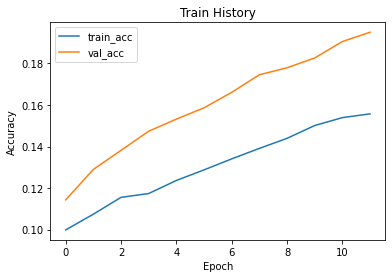

In [16]:
show_train_history('accuracy','val_accuracy')

In [17]:
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

train_history=model.fit(x_img_train_normalize, y_label_train_OneHot,
                        validation_split=0.25,
                        epochs=12, batch_size=128, verbose=1)

Train on 37500 samples, validate on 12500 samples
Epoch 1/12
37500/37500 [==============================] - 4s 114us/step - loss: 0.3172 - accuracy: 0.9000 - val_loss: 0.3169 - val_accuracy: 0.9000
Epoch 2/12
37500/37500 [==============================] - 4s 105us/step - loss: 0.3128 - accuracy: 0.9000 - val_loss: 0.3130 - val_accuracy: 0.9000
Epoch 3/12
37500/37500 [==============================] - 4s 103us/step - loss: 0.3071 - accuracy: 0.9000 - val_loss: 0.3082 - val_accuracy: 0.9000
Epoch 4/12
37500/37500 [==============================] - 4s 104us/step - loss: 0.3014 - accuracy: 0.9001 - val_loss: 0.3040 - val_accuracy: 0.9000
Epoch 5/12
37500/37500 [==============================] - 4s 103us/step - loss: 0.2972 - accuracy: 0.9001 - val_loss: 0.2998 - val_accuracy: 0.9000
Epoch 6/12
37500/37500 [==============================] - 4s 102us/step - loss: 0.2935 - accuracy: 0.9003 - val_loss: 0.2970 - val_accuracy: 0.9000
Epoch 7/12
37500/37500 [==============================] - 4s 1

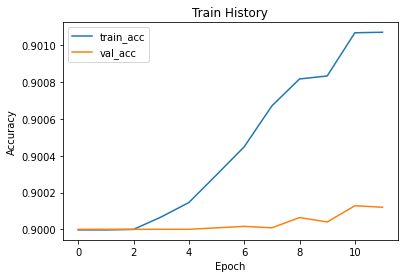

In [18]:
show_train_history('accuracy','val_accuracy')